# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [1]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/Flor/Anaconda3/envs/diplodatos/Library/bin/graphviz'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TODO: Agregar las librerías que hagan falta
from ml.visualization import plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz 

np.random.seed(0)  # Para mayor determinismo

__Descripción del dataset:__

El departamento de crédito al consumidor de un banco quiere automatizar el proceso de toma de decisiones para la aprobación de líneas de crédito con garantía hipotecaria. Para hacer esto, seguirán las recomendaciones de la Ley de Igualdad de Oportunidades de Crédito para crear un modelo de puntuación de crédito empíricamente derivado y estadísticamente sólido. El modelo se basará en los datos recopilados de solicitantes recientes que recibieron crédito a través del proceso actual de suscripción de préstamos. El modelo se construirá a partir de herramientas de modelado predictivo, pero el modelo creado debe ser lo suficientemente interpretable para proporcionar una razón para cualquier acción adversa (rechazos).

El conjunto de datos sobre el valor acumulado de la vivienda (HMEQ) contiene información de línea de base y rendimiento del préstamo para 5,960 préstamos recientes sobre el valor acumulado de la vivienda. El objetivo (BAD) es una variable binaria que indica si un solicitante eventualmente dejó de cumplir con los pagos o si estaba seriamente en mora. Este resultado adverso ocurrió en 1.189 casos (20%). Para cada solicitante, se registraron 12 variables de entrada.

__Atributos:__

TARGET. Etiqueta: 1 = cliente incumplido en préstamo - 0 = préstamo pagado

LOAN. Cantidad de la solicitud de préstamo

MORTDUE. Monto a pagar de la hipoteca existente

VALUE. Valor de la propiedad actual

YOJ. Años en el trabajo actual

DEROG. Número de informes despectivos principales

DELINQ. Número de líneas de crédito morosas

CLAGE. Edad de la línea comercial más antigua en meses.

NINQ. Número de líneas de crédito recientes

CLNO. Número de líneas de crédito

DEBTINC. Relación deuda / ingresos.

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [2]:
dataset = pd.read_csv("./data/loan_data.csv", comment="#")

# División entre instancias y etiquetas
# La primera columna es el target y las siguientes son los features
X, y = dataset.iloc[:, 1:], dataset.TARGET

# División entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [3]:
list(X_train.columns)

['LOAN',
 'MORTDUE',
 'VALUE',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO',
 'DEBTINC']


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

1. El dataset consiste en datos recopilados de solicitantes recientes que recibieron crédito con garantía hipotecaria a través del proceso actual de suscripción de préstamos de un banco. Contiene 10 atributos listados anteriormente, más el target.
2. El TARGET es la variable objetivo que se trata de predecir para nuevos solicitantes. Ésta indica si el cliente cumple con el préstamo o no.
3. Los atributos disponibles para predecir son:

        LOAN. Cantidad de la solicitud de préstamo

        MORTDUE. Monto a pagar de la hipoteca existente

        VALUE. Valor de la propiedad actual

        YOJ. Años en el trabajo actual

        DEROG. Número de informes despectivos principales

        DELINQ. Número de líneas de crédito morosas

        CLAGE. Edad de la línea comercial más antigua en meses.

        NINQ. Número de líneas de crédito recientes

        CLNO. Número de líneas de crédito

        DEBTINC. Relación deuda / ingresos.

4. De antemano creería que los atributos más determinantes para conferir el préstamo son: VALUE, YOJ, DELINQ, DEBTINC

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Conclusión:

__Se probó hacer la clasificación considerando todos los atributos. Con los parámetros por defecto y tambien variando los mismos. El resultado obtenido en todos los casos fue muy malo ya que se clasificaban todas las muestras como 0: préstamo pagado.__

__Se probó luego elegiendo menos cantidad de atributos, y aquellos considerados más determinantes del target en busca de un mejor clasificador lineal. Se encontró que los que mejor funcionan son DELINQ y DEBTINC. Aún así el desempeño conseguido con un clasificador lineal esta lejos de ser el ideal.__

In [4]:
# X_train, X_test, y_train, y_test

feature_train = X_train[["DELINQ","DEBTINC"]]
feature_test = X_test[["DELINQ","DEBTINC"]]
# feature_train, feature_test, y_train, y_test 

### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

El accuracy sobre el conjunto de entrenamiento es: 0.85
El accuracy sobre el conjunto de evaluación es: 0.86

Reporte de clasificación para el conjunto de entrenamiento: 

               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1232
           1       1.00      0.14      0.24       251

    accuracy                           0.85      1483
   macro avg       0.93      0.57      0.58      1483
weighted avg       0.88      0.85      0.81      1483

Reporte de clasificación para el conjunto de evaluación: 

               precision    recall  f1-score   support

           0       0.86      1.00      0.92       313
           1       0.88      0.12      0.21        58

    accuracy                           0.86       371
   macro avg       0.87      0.56      0.57       371
weighted avg       0.86      0.86      0.81       371



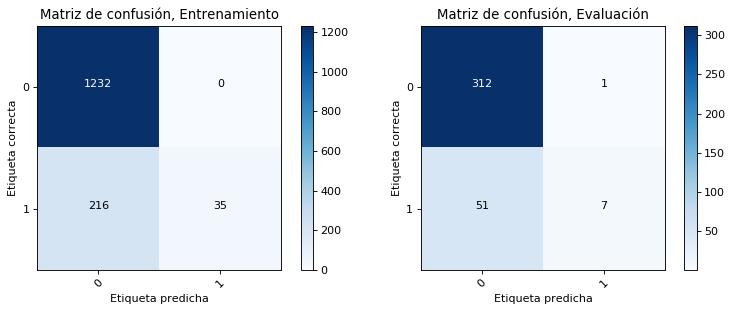

In [5]:
model = SGDClassifier(random_state=0, tol=0.001) 
# tol=0.001 es el valor para el criterio de parada, definido por defecto, lo agrego para evitar un warning
model.fit(feature_train, y_train)

ytrain_pred = model.predict(feature_train)
ytest_pred = model.predict(feature_test)

print('El accuracy sobre el conjunto de entrenamiento es: %.2f'% accuracy_score(y_train, ytrain_pred))
print('El accuracy sobre el conjunto de evaluación es: %.2f'% accuracy_score(y_test, ytest_pred))

print('\nReporte de clasificación para el conjunto de entrenamiento: \n\n', classification_report(y_train, ytrain_pred))
print('Reporte de clasificación para el conjunto de evaluación: \n\n', classification_report(y_test, ytest_pred))

plt.figure(figsize=(10, 4), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(1,2,1)
plot_confusion_matrix(confusion_matrix(y_train, ytrain_pred),classes=['0','1'], 
                      title="Matriz de confusión, Entrenamiento")
plt.subplot(1,2,2)
plot_confusion_matrix(confusion_matrix(y_test, ytest_pred),classes=['0','1'], 
                      title="Matriz de confusión, Evaluación")



### Conclusión:

__Se entrena el modelo y se evalúa con los hiperparámetros por defecto. El dataset tiene dos clases pero está desbalanceado ya que un 20% corresponde a clientes que no cumplieron con el préstamo y un 80% a clientes que si lo hicieron. Por ello se observa un valor de accuracy alto en la predicción, aunque la clase 1 este muy mal clasificada. Ello se ve en el bajo valor de recall para la clase 1.__

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html



Función de costo:  hinge 
Tipo de regularizador:  l2 
Score: accuracy
  param_alpha param_eta0 mean_test_score std_test_score
0         0.1        0.1        0.850303     0.00249418
1         0.1       0.01        0.850303     0.00249418
2         0.1      0.001        0.850303     0.00249418
3        0.01        0.1        0.820634      0.0717238
4        0.01       0.01        0.820634      0.0717238
5        0.01      0.001        0.820634      0.0717238
6       0.001        0.1        0.705327       0.140283
7       0.001       0.01        0.705327       0.140283
8       0.001      0.001        0.705327       0.140283

Mejor conjunto de parámetros:
{'alpha': 0.1, 'eta0': 0.1}


Función de costo:  hinge 
Tipo de regularizador:  l1 
Score: accuracy
  param_alpha param_eta0 mean_test_score std_test_score
0         0.1        0.1        0.840189     0.00652882
1         0.1       0.01        0.840189     0.00652882
2         0.1      0.001        0.840189     0.00652882
3        0.01

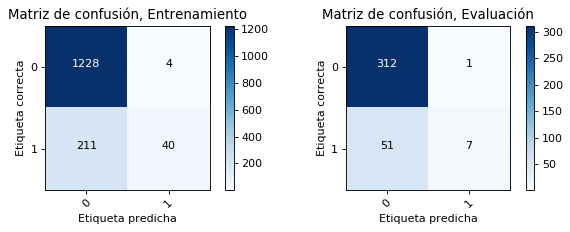

In [6]:
plt.figure(figsize=(8,3), dpi= 80, facecolor='w', edgecolor='k')

# funcs_costo = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']
funcs_costo = ['hinge', 'log', 'perceptron']
tiporeg = ['l2', 'l1', 'elasticnet']
mejormeanscore = 0
mejorloss = ''
mejorpenalty = ''
mejoreta0 = 0
mejoralpha = 0

for loss in funcs_costo:
    for penalty in tiporeg:
        print('\n\nFunción de costo: ', loss, '\nTipo de regularizador: ', penalty, '\nScore: accuracy')
        
        param_grid = {'eta0': [0.1, 0.01, 0.001],  # Tasa de entrenamiento
                    'alpha': [0.1, 0.01, 0.001]  # Tasa de regularización
        }
        graddes = SGDClassifier(loss=loss, tol=0.001, learning_rate='optimal', penalty=penalty, random_state=0) 
        # learning_rate es 'optimal' por default
        # , class_weight={0: 0.8, 1: 0.2} or "balanced" da peores resultados

        model = GridSearchCV(estimator=graddes, param_grid=param_grid, cv=5, scoring='accuracy', iid=True)    
        # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
        # cv= integer, to specify the number of folds in a (Stratified)KFold: The folds are made 
        # by preserving the percentage of samples for each class.
        model.fit(feature_train, y_train)

        columns= ['param_alpha', 'param_eta0', 'mean_test_score', 'std_test_score']
        resultados = np.c_[ np.array(model.cv_results_['param_alpha']), np.array(model.cv_results_['param_eta0']), 
                           np.array(model.cv_results_['mean_test_score']), np.array(model.cv_results_['std_test_score'])]
        resultados = pd.DataFrame(data=resultados, columns=columns)

        print(resultados, end="\n")

        print("\nMejor conjunto de parámetros:")
        print(model.best_params_, end="\n")
        
        ytrain_pred = model.predict(feature_train)
        ytest_pred = model.predict(feature_test)

        # Encuentro la primera mejor configuración de parámetros:
        if model.cv_results_['mean_test_score'].max() > mejormeanscore:
            mejormeanscore = model.cv_results_['mean_test_score'].max()
            mejorloss = loss
            mejorpenalty = penalty
            mejoreta0 = model.best_params_['eta0']
            mejoralpha = model.best_params_['alpha']
            predytrain = ytrain_pred
            predytest = ytest_pred
            
        
# PARA LA MEJOR CONFIG ENCONTRADA:     
print('\n\n================================================================================')

print('\nLos mejores parámetros encontrados son:\n   Función de costo: \"%s\"' % mejorloss,
          '\n   Tipo de regularizador: \"%s\"' % mejorpenalty,
         '\n   Tasa de entrenamiento', mejoreta0, '\n   Tasa de regularización', mejoralpha)

print('\nAccuracy para entrenamiento es: %.3f'% accuracy_score(y_train, predytrain))
print('Accuracy para evaluación es: %.3f'% accuracy_score(y_test, predytest))

print('\nReporte de clasificación para entrenamiento: \n\n', classification_report(y_train, predytrain))
print('Reporte de clasificación para evaluación: \n\n', classification_report(y_test, predytest))   

plt.subplot(1,2,1)
plot_confusion_matrix(confusion_matrix(y_train, predytrain),classes=['0','1'],
                      title="Matriz de confusión, Entrenamiento")

plt.subplot(1,2,2)
plot_confusion_matrix(confusion_matrix(y_test, predytest),classes=['0','1'],
                      title="Matriz de confusión, Evaluación")
plt.show()


### Conclusión:

__Se hizo el ajuste de los hiperparámetros probando diferentes funciones de loss, tipos de regularización, tasas de entrenamiento y tasas de regularización. Se trabajó con los mismos atributos encontrados en el paso anterior pues considerando todos los atributos el resultado era tan malo como cuando se trabajaba con hiperparámetros por defecto.__

__Aún así, la matriz de confusión y los resultados obtenidos de precision y recall para las clases 0 y 1 con la mejor configuración de parámetros muestran que la clasificación no es óptima con el modelo lineal.__

## Ejercicio 3: Árbol de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


El accuracy sobre el conjunto de entrenamiento es: 1.00
El accuracy sobre el conjunto de evaluación es: 0.88

Reporte de clasificación para el conjunto de entrenamiento: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1232
           1       1.00      1.00      1.00       251

    accuracy                           1.00      1483
   macro avg       1.00      1.00      1.00      1483
weighted avg       1.00      1.00      1.00      1483

Reporte de clasificación para el conjunto de evaluación: 

               precision    recall  f1-score   support

           0       0.93      0.93      0.93       313
           1       0.62      0.64      0.63        58

    accuracy                           0.88       371
   macro avg       0.77      0.78      0.78       371
weighted avg       0.88      0.88      0.88       371



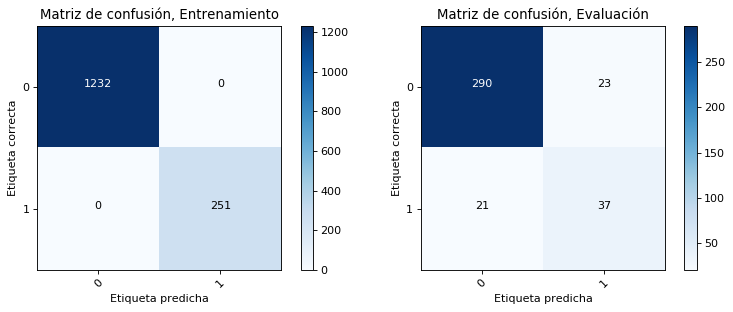

In [7]:
arbol = DecisionTreeClassifier(random_state=0)
arbol.fit(X_train, y_train)

ytrain_pred = arbol.predict(X_train)
ytest_pred = arbol.predict(X_test)

print('El accuracy sobre el conjunto de entrenamiento es: %.2f'% accuracy_score(y_train, ytrain_pred))
print('El accuracy sobre el conjunto de evaluación es: %.2f'% accuracy_score(y_test, ytest_pred))

print('\nReporte de clasificación para el conjunto de entrenamiento: \n\n', classification_report(y_train, ytrain_pred))
print('Reporte de clasificación para el conjunto de evaluación: \n\n', classification_report(y_test, ytest_pred))

plt.figure(figsize=(10, 4), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(1,2,1)
plot_confusion_matrix(confusion_matrix(y_train, ytrain_pred),classes=['0','1'], 
                      title="Matriz de confusión, Entrenamiento")
plt.subplot(1,2,2)
plot_confusion_matrix(confusion_matrix(y_test, ytest_pred),classes=['0','1'], 
                      title="Matriz de confusión, Evaluación")



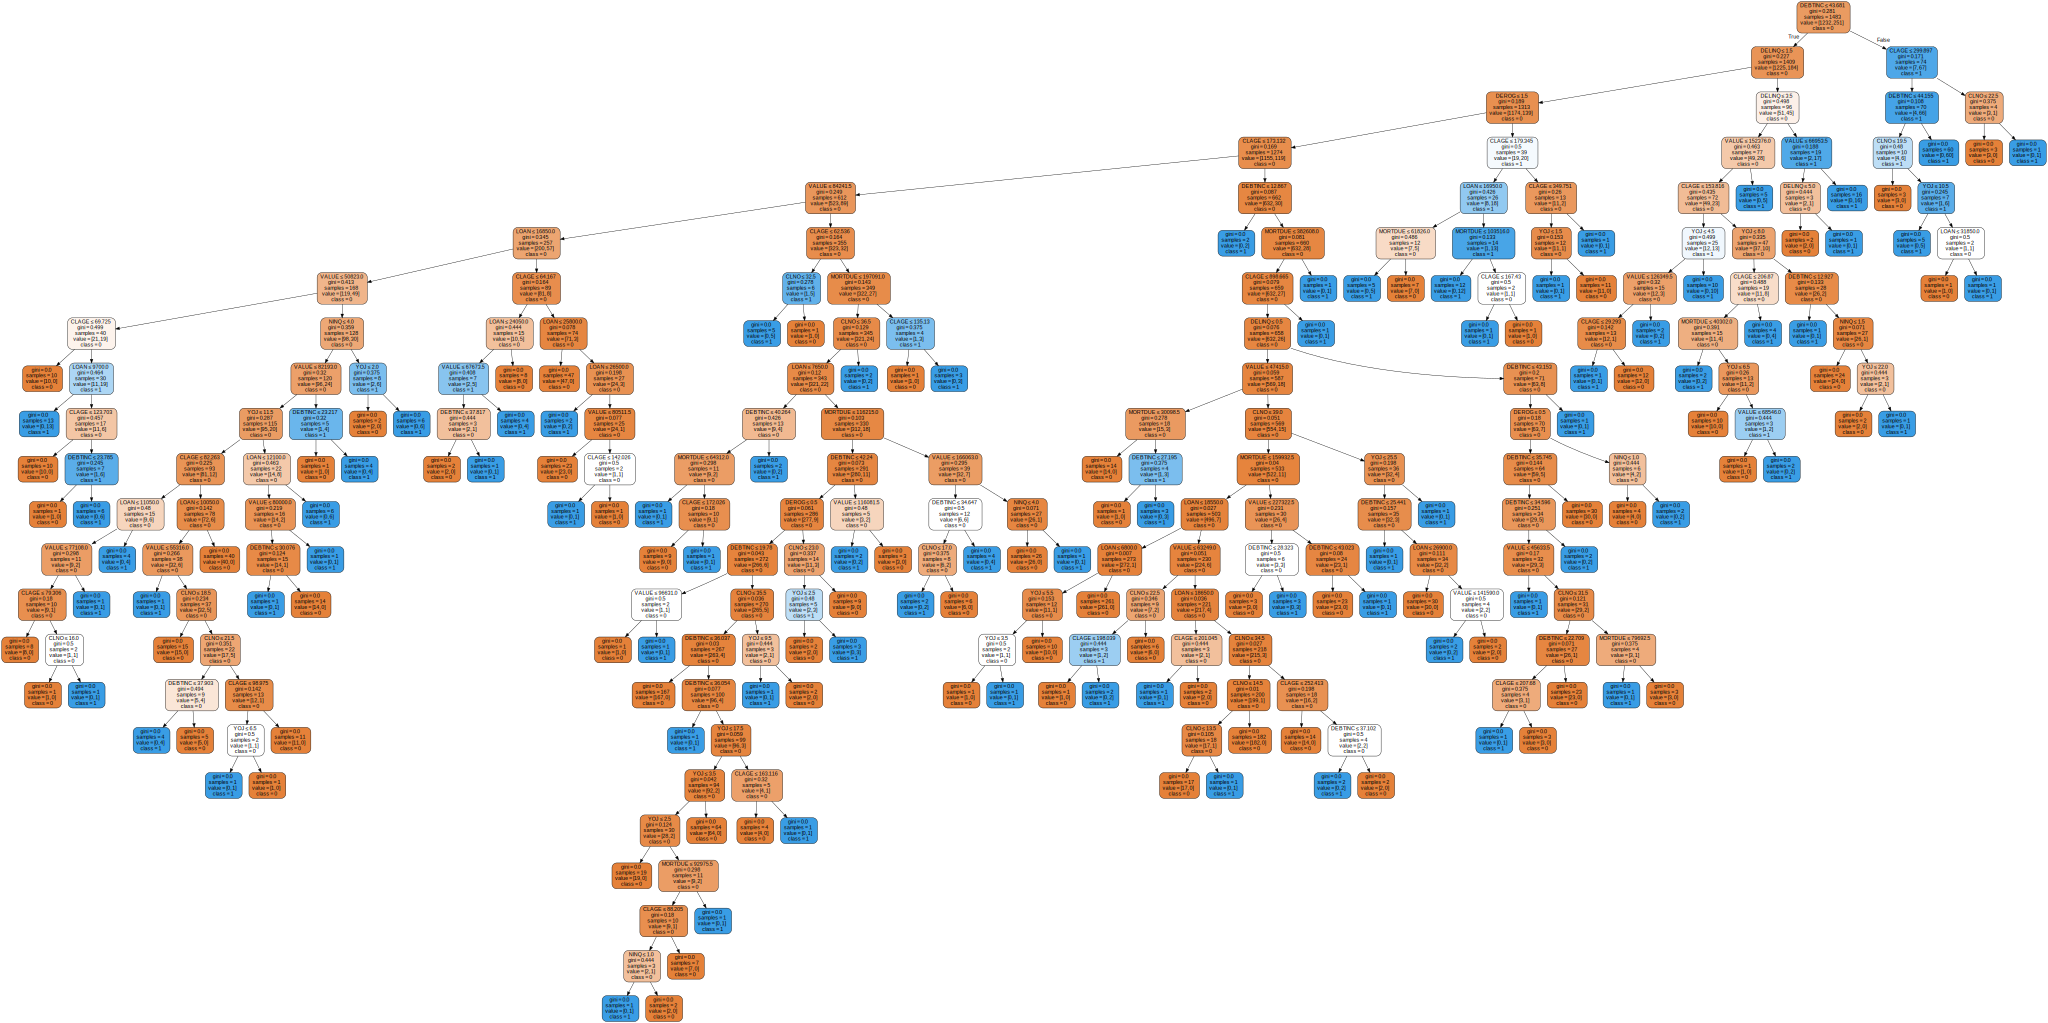

In [8]:
dot_data = export_graphviz(arbol, out_file=None, 
                         feature_names=list(X_train.columns),  
                         class_names=['0','1'],  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Conclusión:

__Se observa que el modelo de árbol de decisión aprende mejor sobre el conjunto de datos que el modelo lineal.__

__En éste caso, el árbol de decisión con los hiperparámetros por defecto aprende demasiado bien sobre el conjunto de entrenamiento haciendo overfitting. Luego, sobre el conjunto de evaluación, los resultados obtenidos muestran que la clasificación de la clase 1 no es óptima, ésto puede deberse a que el modelo hizo overfitting sobre el entrenamiento y perdió capacidad para generalizar a conjuntos de datos no vistos.__

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Accuracy promedio y varianza para todas las configuraciones:

   criterion max_depth min_samples_leaf mean_test_score std_test_score
0       gini         5                2        0.874594      0.0142439
1       gini         5                5        0.873923      0.0128962
2       gini         5                7        0.875275       0.014439
3       gini        10                2        0.880009      0.0219341
4       gini        10                5        0.877993      0.0211108
5       gini        10                7        0.870606      0.0311798
6       gini        20                2        0.861133      0.0240327
7       gini        20                5        0.866529      0.0243293
8       gini        20                7        0.870595      0.0261665
9    entropy         5                2        0.877966     0.00866976
10   entropy         5                5        0.873926     0.00861525
11   entropy         5                7        0.873914     0.00522511
12   entropy   

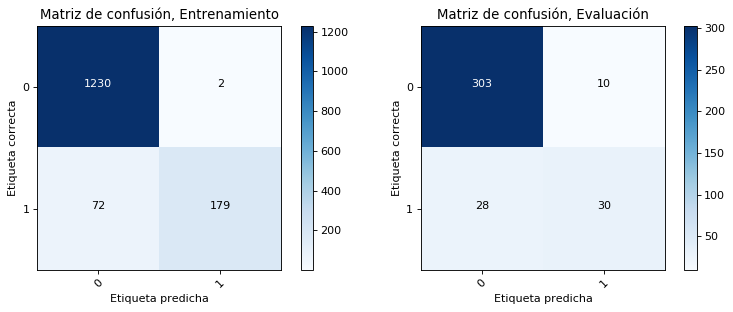

In [9]:
# Parámetros a probar:
grid_param = {'criterion':('gini', 'entropy'), 'max_depth':(5,10,20), 'min_samples_leaf':(2,5,7)}

arbol = DecisionTreeClassifier(random_state=0)
arbol = GridSearchCV(arbol, grid_param, scoring='accuracy', cv=5, iid=False)

# Datos de entrenamiento:
arbol.fit(X_train, y_train)

# DataFrame con accuracy promedio y varianza para todas las configuraciones:
columns= ['criterion', 'max_depth', 'min_samples_leaf', 'mean_test_score', 'std_test_score']
resultados = np.c_[ np.array(arbol.cv_results_['param_criterion']), np.array(arbol.cv_results_['param_max_depth']), 
                   np.array(arbol.cv_results_['param_min_samples_leaf']), np.array(arbol.cv_results_['mean_test_score']),
                   np.array(arbol.cv_results_['std_test_score'])]
resultados = pd.DataFrame(data=resultados, columns=columns)
print('Accuracy promedio y varianza para todas las configuraciones:\n')
print(resultados, end="\n")

# Mejor configuración de hiperparámetros encontrada:
mejor_arbol = arbol.best_estimator_
print('\nMejor accuracy promedio: ', arbol.best_score_)
print(mejor_arbol)

# Predicciones con el modelo y reporte de resultados:
ytrain_pred = arbol.predict(X_train)
ytest_pred = arbol.predict(X_test)

print('\nEl accuracy sobre el conjunto de entrenamiento es: %.2f'% accuracy_score(y_train, ytrain_pred))
print('El accuracy sobre el conjunto de evaluación es: %.2f'% accuracy_score(y_test, ytest_pred))

print('\nReporte de clasificación para el conjunto de entrenamiento: \n\n', classification_report(y_train, ytrain_pred))
print('Reporte de clasificación para el conjunto de evaluación: \n\n', classification_report(y_test, ytest_pred))

plt.figure(figsize=(10, 4), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(1,2,1)
plot_confusion_matrix(confusion_matrix(y_train, ytrain_pred),classes=['0','1'], 
                      title="Matriz de confusión, Entrenamiento")
plt.subplot(1,2,2)
plot_confusion_matrix(confusion_matrix(y_test, ytest_pred),classes=['0','1'], 
                      title="Matriz de confusión, Evaluación")

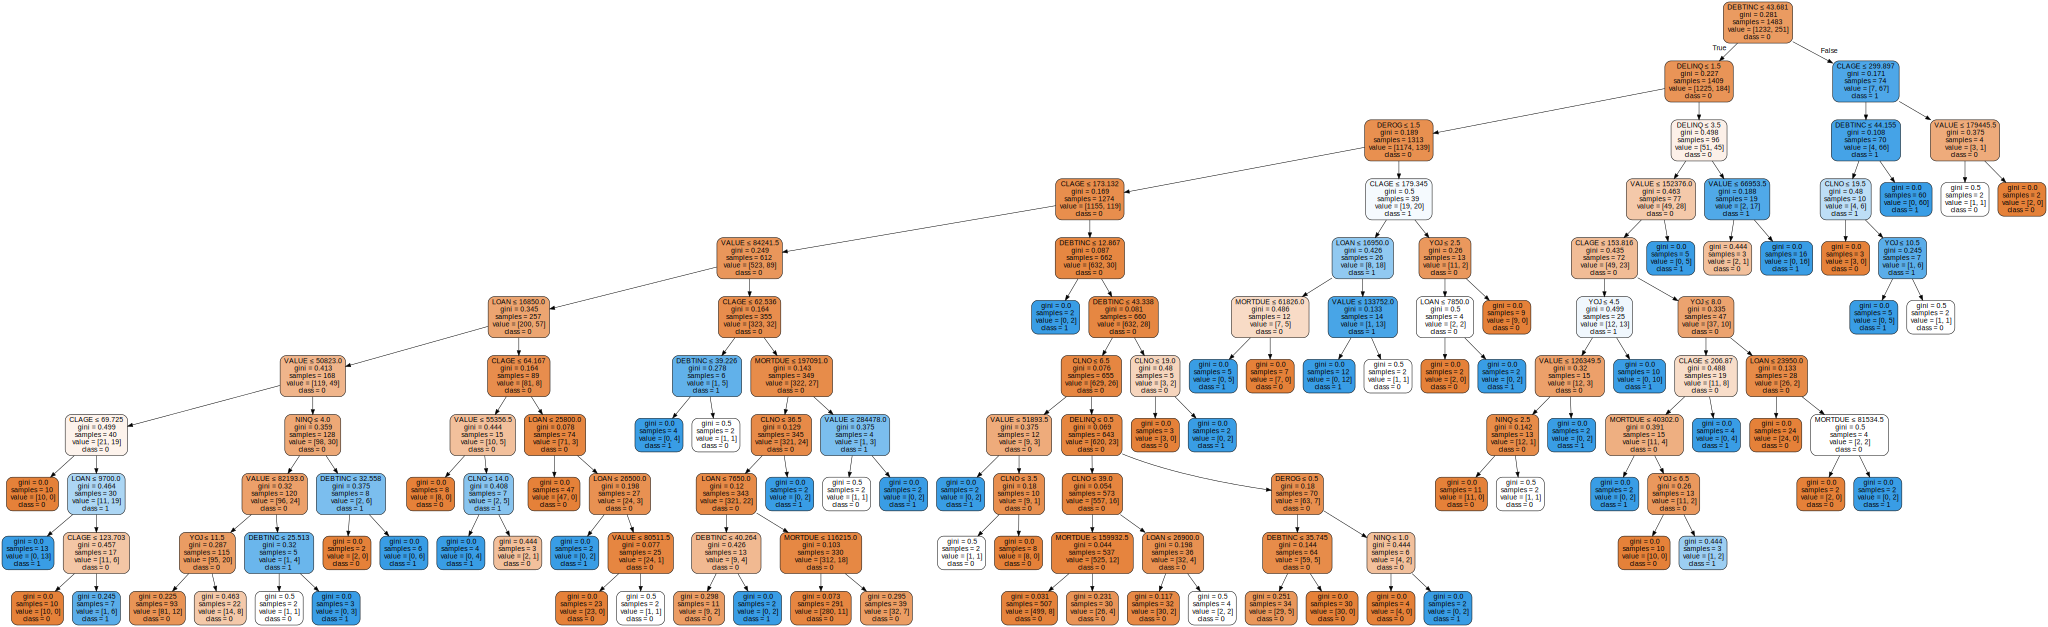

In [10]:
# Ploteo el árbol:
arbol = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=2, min_samples_split=2,
                               random_state=0, splitter='best')
arbol.fit(X_train, y_train)

dot_data = export_graphviz(arbol, out_file=None, 
                         feature_names=list(X_train.columns),  
                         class_names=['0','1'],  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Conclusión:

__Corriendo el modelo repetidas veces se probaron:__

__Primero la grilla de parámetros: {'criterion':('gini', 'entropy'), 'max_depth':(5,10,20), 'min_samples_leaf':(2,5,7)}. Con ello se obtuvo como mejor modelo: criterion='gini', max_depth=10, min_samples_leaf=2.__ Y los resultados:

El accuracy sobre los conjuntos de entrenamiento y evaluación: 0.95 y 0.90 respectivamente

_-Entrenamiento:_

Precision para las clases 0 y 1: 0.94 y 0.99 respectivamente

Recall para las clases 0 y 1: 1.00 y 0.71 respectivamente

_-Evaluación:_

Precision para las clases 0 y 1: 0.92 y 0.75 respectivamente

Recall para las clases 0 y 1: 0.97 y 0.52 respectivamente

__Luego se intentó refinar la grilla para obtener un mejor desempeño sobre el conjunto de evaluación. Para ello se uso la grilla: {'criterion':('gini', 'entropy'), 'max_depth':(8,10,12), 'min_samples_leaf':(2,3,4)}.__ Y se obtuvieron:

El accuracy sobre los conjuntos de entrenamiento y evaluación: 0.93 y 0.89 respectivamente

_-Entrenamiento:_

Precision para las clases 0 y 1: 0.93 y 0.91 respectivamente

Recall para las clases 0 y 1: 0.99 y 0.66 respectivamente

_-Evaluación:_

Precision para las clases 0 y 1: 0.92 y 0.66 respectivamente

Recall para las clases 0 y 1: 0.95 y 0.57 respectivamente

__Como conclusión se llegó a que el desempeño del modelo de árbol de decisión, tanto sobre el conjunto de entrenamiento como en el de evaluación, era mejor con los primeros parámetros encontrados por GridSearch: criterion='gini', max_depth=10, min_samples_leaf=2__